# <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto">Описание</div>

В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

## <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto">Содержание</div>

****

1. [Загрузка и исследовательский анализ данных:](#load_and_data_analysis)
    - [Загрузка библиотек](#load_libraries)
    - [Импорт библиотек](#import_libraries)
    - [Загрузка данных](#load_data)
    - [Исследовательский анализ](#data_analysis)
    - [Выводы по результатам анализа](#analysis_conclusions)
2. [Предобработка данных и обучение моделей](#preprocessing_and_model_training)
    - [Удаление аномалий](#remove_outliers)
    - [Генерация новых признаков](#feature_engineering)
    - [Создание единого датафрейма](#merge_dataframes)
    - [Обработка пропусков](#missing_values)
    - [Проверка на мультиколлинеарность](#multicollinearity_check)
    - [Подготовка выборок для обучения моделей](#data_preparation)
    - [Выбор моделей](#model_selection)
    - [Обучение моделей с определением лучшей (MAE)](#training_best_mae)
    - [Проверка качества на тестовой выборке](#test_quality_check)
    - [Анализ важности факторов (признаков)](#feature_importance_analysis)
    - [Вывод](#preprocessing_conclusions)
3. [Отчет о проделанной работе](#project_report)

****

## <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto"><a id="load_and_data_analysis"></a>Загрузка и исследовательский анализ данных</div>

### <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto"><a id="load_libraries"></a>Загрузка библиотек</div>

In [1]:
# %pip install plotly==5.5.0
# %pip install -U kaleido

### <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto"><a id="import_libraries"></a>Импорт библиотек</div>

In [2]:
import kaleido
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# установка отображения графиков в Jupyter Notebook
pio.renderers.default = "notebook"

# константы
RANDOM_STATE = 42

### <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto"><a id="load_data"></a>Загрузка данных</div>

In [3]:
# Загрузка данных
data = pd.read_csv("../data/adult.csv")

### <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto"><a id="data_analysis"></a>Исследовательский анализ</div>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.duplicated().sum()

52

In [8]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

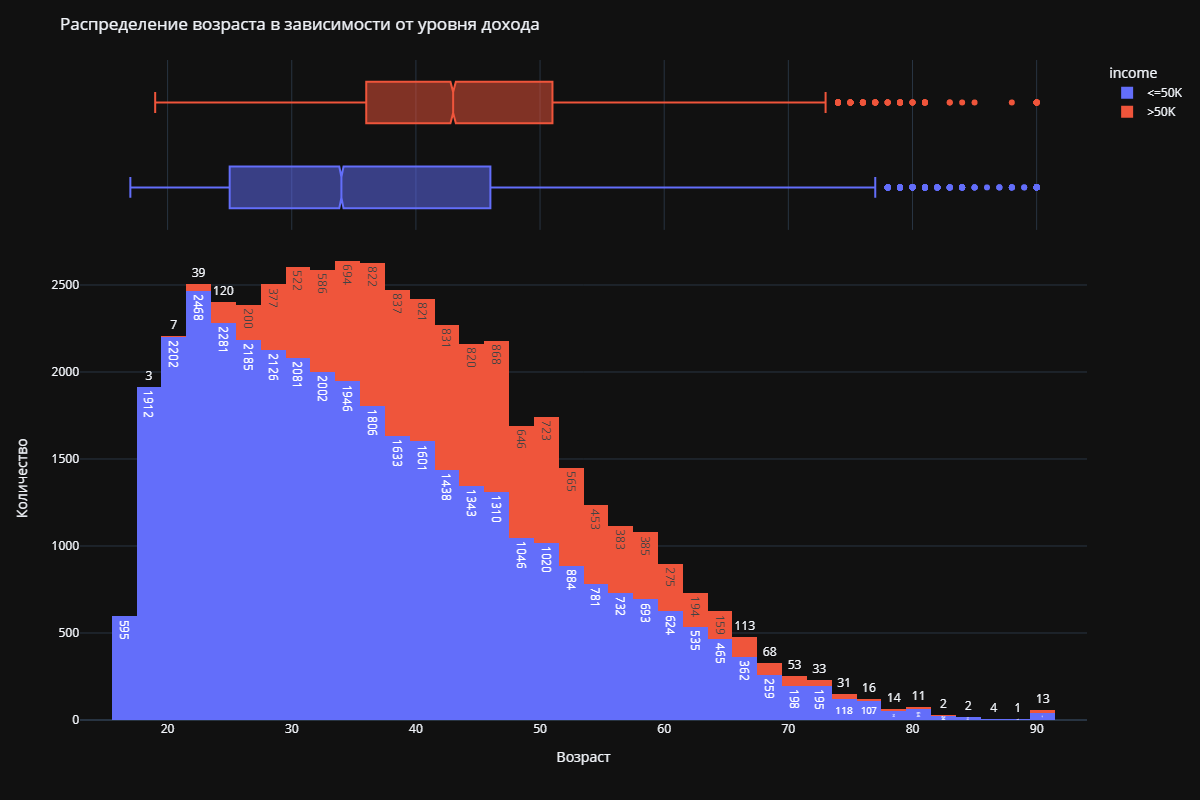

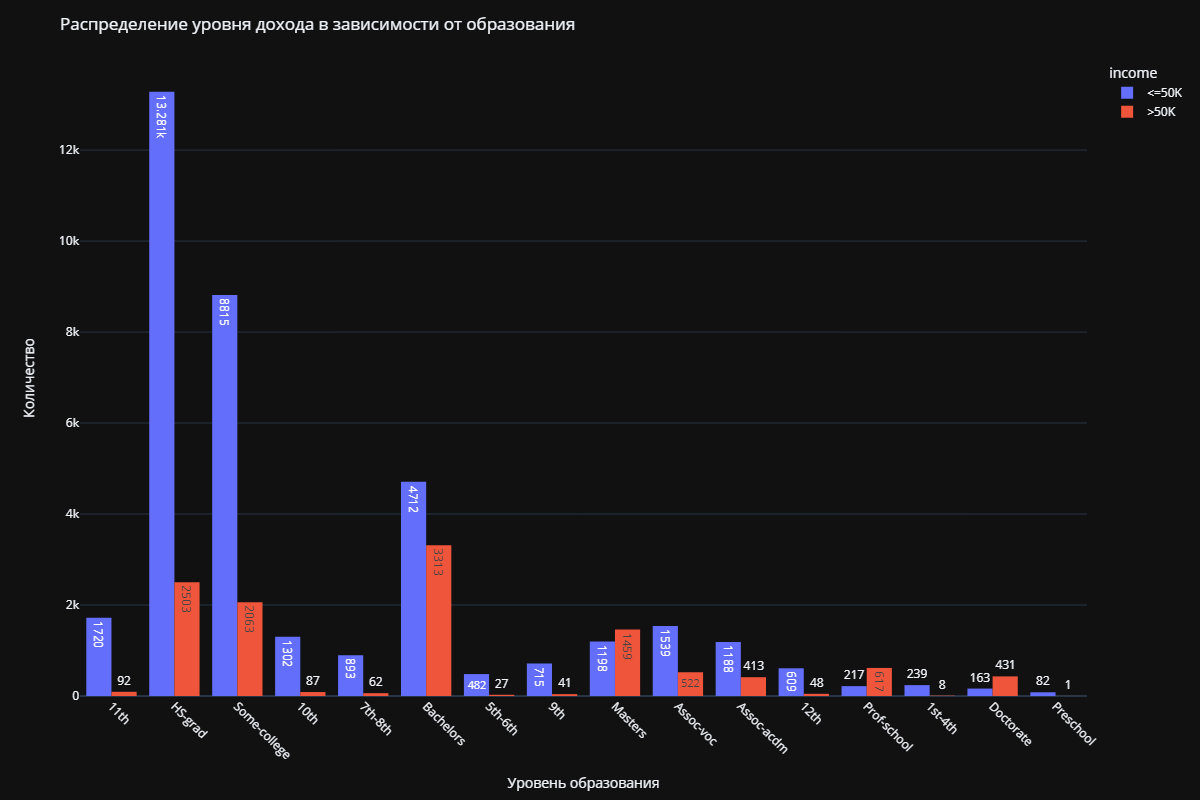

In [9]:
# Пример визуализации по возрасту и доходу
fig_age_income = px.histogram(
    data,
    x="age",
    color="income",
    marginal="box",
    nbins=len(np.histogram_bin_edges(data.age, bins="fd")),
    text_auto=True,
    width=1200,
    height=800,
)
fig_age_income.update_layout(
    title="Распределение возраста в зависимости от уровня дохода",
    xaxis_title="Возраст",
    yaxis_title="Количество",
    showlegend=True,
    template="plotly_dark",
)
fig_age_income.show("png")

# Пример визуализации по образованию и доходу
fig_education_income = px.histogram(
    data,
    x="education",
    color="income",
    barmode="group",
    text_auto=True,
    width=1200,
    height=800,
)
fig_education_income.update_layout(
    title="Распределение уровня дохода в зависимости от образования",
    xaxis_title="Уровень образования",
    yaxis_title="Количество",
    showlegend=True,
    template="plotly_dark",
)
fig_education_income.update_xaxes(tickangle=45)
fig_education_income.show("png")

### <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto"><a id="analysis_conclusions"></a>Выводы по резутатам анализа</div>

1. В данных присутствуют пропуски, отмеченные вопросительным знаком - "?"

### <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto"><a id="remove_outliers"></a>Удаление пропусков</div>

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [11]:
data = data.replace("?", np.nan)

In [12]:
data.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [13]:
data = data.dropna()

In [14]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [15]:
data = data.drop_duplicates()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   fnlwgt           45175 non-null  int64 
 3   education        45175 non-null  object
 4   educational-num  45175 non-null  int64 
 5   marital-status   45175 non-null  object
 6   occupation       45175 non-null  object
 7   relationship     45175 non-null  object
 8   race             45175 non-null  object
 9   gender           45175 non-null  object
 10  capital-gain     45175 non-null  int64 
 11  capital-loss     45175 non-null  int64 
 12  hours-per-week   45175 non-null  int64 
 13  native-country   45175 non-null  object
 14  income           45175 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


## <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto"><a id="preprocessing_and_model_training"></a>Предобработка данных и обучение моделей</div>

In [17]:
# Преобразование категориальных признаков в числовые
categorical_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "gender",
    "native-country",
    "income",
]

for col in categorical_columns:
    data[col] = data[col].astype("category").cat.codes

# Проверим преобразования
print(data.head())

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          2  226802          1                7               4   
1   38          2   89814         11                9               2   
2   28          1  336951          7               12               2   
3   44          2  160323         15               10               2   
5   34          2  198693          0                6               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           6             3     2       1             0             0   
1           4             0     4       1             0             0   
2          10             0     4       1             0             0   
3           6             0     2       1          7688             0   
5           7             1     4       1             0             0   

   hours-per-week  native-country  income  
0              40              38       0  
1              50              38 

In [18]:
# Целевая переменная и признаки
X = data.drop("income", axis=1)
y = data["income"]

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

print(f"Размер обучающего множества: {X_train.shape}")
print(f"Размер тестового множества: {X_test.shape}")

Размер обучающего множества: (36140, 14)
Размер тестового множества: (9035, 14)


In [19]:
# Логистическая регрессия

"""
Сознательно добавлен пайплайн со стандартизацией. В противном случае получал ошибку:
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Рассчету accuracy это не мешало, но большая красная плашка в середине проекта прорядочно раздражала.
"""

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train, y_train)
y_pred_pipe = pipe.predict(X_test)

# Оценка логистической регрессии
log_reg_accuracy = accuracy_score(y_test, y_pred_pipe)
print(f"Точность модели логистической регрессии: {log_reg_accuracy}")

Точность логистической регрессии: 0.8163807415605977


In [20]:
# Модель опорных векторов
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Оценка модели опорных векторов
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Точность модели опорных векторов: {svc_accuracy}")

Точность модели опорных векторов: 0.7947980077476481


### <div style="padding:10px;color:white;margin:0;font-size:100%;text-align:center;display:fill;border-radius:10px;background-color:#215f95; overflow:hidden;font-weight:501;font-family:Roboto"><a name="preprocessing_conclusions"></a>Вывод</div>

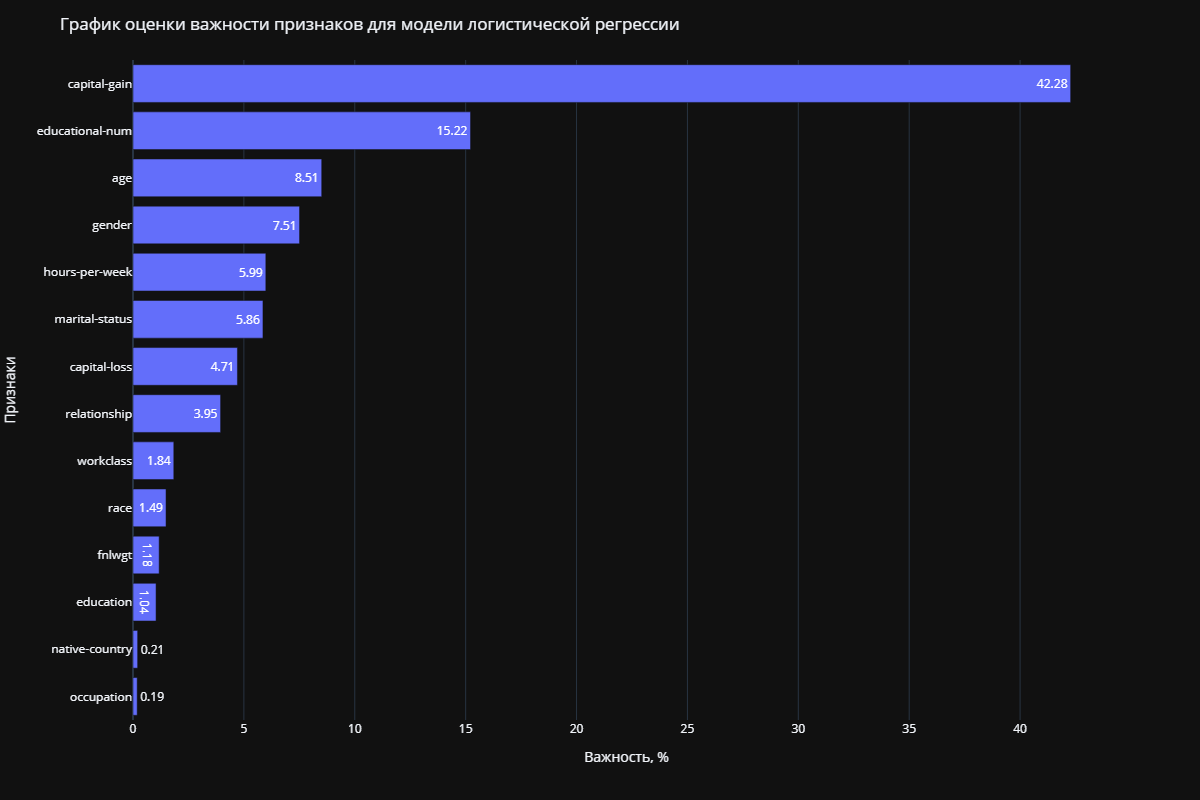

In [21]:
# Извлекаем абсолютные значения коэффициентов
importance = np.abs(pipe.named_steps['logisticregression'].coef_[0])

# Сортировка важности признаков и их имен
sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_feature_names = np.array(X_test.columns)[sorted_indices]

# Преобразуем важность в проценты
importance_percent = np.round(sorted_importance / np.sum(sorted_importance) * 100, 2)

# Создаем график
fig = px.bar(
    pd.Series(importance_percent, index=sorted_feature_names).sort_values(
        ascending=True
    ),
    orientation="h",
    text_auto=True,
)

# Настраиваем параметры графика
fig.update_layout(
    title="График оценки важности признаков для модели логистической регрессии",
    xaxis_title="Важность, %",
    yaxis_title="Признаки",
    showlegend=False,
    template="plotly_dark",
    height=800,
    width=1200,
)

# Выводим график
fig.show("png")

1. **Точность моделей:**
   - Точность логистической регрессии: `0.8163807415605977` (без использования стандартизации ~ 0.8)
   - Точность модели опорных векторов: `0.7947980077476481`

2. **Преобразования данных:**
   - Были обработаны пропуски в данных, путем их удаления.
   - Категориальные признаки были преобразованы в числовые коды.

3. **Сравнение моделей:**
   - Модель логистической регрессии и модель опорных векторов показали довольно близкие результаты по точности предсказаний, но для настоящей задачи модель логистической регрессии оказалась наиболее подходящей.

4. **Рекомендации по улучшению:**
   - Использование кросс-валидации для более точного определения результатов моделей.
   - Применение методов подбора гиперпараметров (например, GridSearchCV).

5. **График оценкки важности признаков:**
   - Наиболее важным признаками оказались: `capital-gain` (~~неожиданно~~), `education-num` и `age`